# Project: Supervised Learning - Personal Loan Campaign Modelling

### Thera Bank Personal Loan Campaign

This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget

### Datasets Information:

The dataset contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign.


### Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Learning Outcomes:
Exploratory Data Analysis

Preparing the data to train a model

Training and making predictions using a classificationmodel

Model evaluation


#### Domain 
Banking


## Attribute Information: 

ID: Customer ID 

Age: Customer's age in completed years 

Experience: #years of professional experience 

Income: Annual income of the customer ($000) 

ZIP Code: Home Address ZIP code. 

Family: Family size of the customer 

CCAvg: Avg. spending on credit cards per month ($000) 

 Education: Education Level. 1: Undergrad; 2: Graduate; 3:  Advanced/Professional 

Mortgage: Value of house mortgage if any. ($000) 

Personal Loan: Did this customer accept the personal loan offered in the last campaign? 

Securities Account: Does the customer have a securities account with the bank? 

 CD Account: Does the customer have a certificate of deposit (CD) account with the bank? 

 Online: Does the customer use internet banking facilities? 

Credit card: Does the customer use a credit card issued by the bank? 
 
 

## Ask

1.Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation. (5 marks) 

2.Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings
* Number of unique in each column? 
* Numberof people with zero mortgage?
* Number of people with zero credit card spending per month? 
* Value counts of all categorical columns.
* Univariate and Bivariate
* Get data model ready

3.Split the data into training and test set in the ratio of 70:30 respectively (5marks) 

4.Use Logistic  Regression model to predict whether the customer will  take  personal  loan  or not. Print all the metrics related for evaluating the model performance (15 marks)

5.Check different parameters  of  Logistic  Regression  and  give  your  reasoning whether  the modelperformance is affected due to it or not?(10 marks)

6.Give Business understanding of your model? (5 marks) 

###  Githublink

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-sannidhisiva/tree/master/Logistic-Regression_Project2


### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os,sys
import pandas as pd
import numpy as np
from scipy import stats
# importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
sns.distributions._has_statsmodels=False
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, classification_report, confusion_matrix,auc
from sklearn.metrics import recall_score,precision_score, f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Set color code,font scale..
sns.set(color_codes=True,rc={'figure.figsize':(35.0,35.0)},font_scale=1)
%matplotlib inline 


In [3]:
#Bank personal Loan Data
Bank_Personal_DF =  pd.read_csv('Bank_Personal_Loan_Modelling.csv')
Bank_Personal_DF.shape

(5000, 14)

### Info, shape, describe, and find the number of missing values in the data

In [4]:
#Can Check if it there is any Null Values with below way

print(Bank_Personal_DF.info())

#SHAPE
print(Bank_Personal_DF.shape)

#Describe-FIVE POINTS SUMMARY
print(Bank_Personal_DF.describe())

print(Bank_Personal_DF.isnull().any())

print(Bank_Personal_DF.isnull().sum().sum())

display(Bank_Personal_DF.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
(5000, 14)
                ID          Age   Experi

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
Bank_Personal_DF.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [6]:
#Lets analysze the distribution of the various attribute
Bank_Personal_DF.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

### Observation
Experience contains some negative values and experience should not be Negative


The max of Income, Experience, CCAvg, Mortgage, Security Account, CD Accounts, CreditCard is much high then their mean it means they contains some extream values

In [7]:
#ID can be dropped as it is unique with all 5000 Values
Bank_Personal_DF.drop('ID', axis=1, inplace=True)

In [8]:
## Experience should not be negative-Replacing with Median
Bank_Personal_DF['Experience'] = Bank_Personal_DF['Experience'].map(lambda x : Bank_Personal_DF['Experience'].median() if x < 0  else x)

In [9]:
Bank_Personal_DF['Experience'].describe()

count    5000.000000
mean       20.327600
std        11.253035
min         0.000000
25%        11.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [10]:
# remove the rows of data which have missing value(s)
#No Null Values ..Below statement not required
Bank_Personal_DF = Bank_Personal_DF.dropna()

In [11]:
#Creating Profile Report for Analysis
#!pip install pandas_profiling
import pandas_profiling
Bank_Personal_DF.profile_report()

## 2. EDA: Study the data distribution in each attribute and target variable, share your findings 

#### .Number of unique in each column?

In [12]:
#Unique Values

display(Bank_Personal_DF.nunique())

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

### Observation
By checking Above numbers of we can sepeate values as the continuous and categorical data

In [13]:
category_variables=[col for col in Bank_Personal_DF.columns if Bank_Personal_DF[col].nunique()<=5]
print("Category Variables")
print(category_variables)

print()

print("Contniue Variables")
continue_variables=[col for col in Bank_Personal_DF.columns if Bank_Personal_DF[col].nunique()>5]
print(continue_variables)

Category Variables
['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

Contniue Variables
['Age', 'Experience', 'Income', 'ZIP Code', 'CCAvg', 'Mortgage']


In [14]:
#As we are analyzing about Personal Loan it can be removed
category_variables.remove("Personal Loan")
print(category_variables)

['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


#### .Number of people with zero mortgage?

In [15]:
Bank_Personal_DF_ZeroMortage = Bank_Personal_DF[Bank_Personal_DF['Mortgage']==0]
print(Bank_Personal_DF_ZeroMortage.shape[0])
display(Bank_Personal_DF_ZeroMortage)


3462


Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25         1.0      49     91107       4    1.6          1         0   
1      45        19.0      34     90089       3    1.5          1         0   
2      39        15.0      11     94720       1    1.0          1         0   
3      35         9.0     100     94112       1    2.7          2         0   
4      35         8.0      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4994   64        40.0      75     94588       3    2.0          3         0   
4995   29         3.0      40     92697       1    1.9          3         0   
4997   63        39.0      24     93023       2    0.3          3         0   
4998   65        40.0      49     90034       3    0.5          2         0   
4999   28         4.0      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4994              0                   0           0       1           0  
4995              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[3462 rows x 13 columns]

#### .Number of people with zero credit card spending per month?

In [16]:
Bank_Personal_DF_CreditCard = Bank_Personal_DF[Bank_Personal_DF['CCAvg']==0]
print(Bank_Personal_DF_CreditCard.shape[0])
display(Bank_Personal_DF_CreditCard)

106


Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
63     42        17.0      32     94523       4    0.0          2         0   
128    38        14.0      74     92182       2    0.0          1         0   
198    27         3.0      59     94123       4    0.0          1        90   
210    51        26.0      20     92131       2    0.0          1         0   
215    38        14.0      92     95818       2    0.0          1       249   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4801   34        10.0      88     94404       2    0.0          1       121   
4826   56        31.0      81     93943       2    0.0          3       225   
4837   36        10.0     183     95348       2    0.0          1         0   
4910   48        22.0     120     90291       1    0.0          1         0   
4949   29         5.0      64     94114       4    0.0          1       249   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
63                0                   0           0       1           0  
128               0                   1           0       1           0  
198               0                   1           0       1           0  
210               0                   0           0       0           0  
215               0                   0           0       1           1  
...             ...                 ...         ...     ...         ...  
4801              0                   0           0       1           0  
4826              0                   0           0       0           0  
4837              0                   0           0       0           0  
4910              0                   0           0       1           0  
4949              0                   0           0       0           1  

[106 rows x 13 columns]

### .Value counts of all categorical columns.

In [17]:
## category columns

#Zip code is numerical but it not continuous and it can be like a category because zip code is defining a region 
# and the region should be categorical value.

category_variables = ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
for i in category_variables:
    display(i)
    display(Bank_Personal_DF[i].value_counts(normalize=True))

'ZIP Code'

94720    0.0338
94305    0.0254
95616    0.0232
90095    0.0142
93106    0.0114
          ...  
96145    0.0002
94970    0.0002
94598    0.0002
90068    0.0002
94087    0.0002
Name: ZIP Code, Length: 467, dtype: float64

'Family'

1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64

'Education'

1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64

'Personal Loan'

0    0.904
1    0.096
Name: Personal Loan, dtype: float64

'Securities Account'

0    0.8956
1    0.1044
Name: Securities Account, dtype: float64

'CD Account'

0    0.9396
1    0.0604
Name: CD Account, dtype: float64

'Online'

1    0.5968
0    0.4032
Name: Online, dtype: float64

'CreditCard'

0    0.706
1    0.294
Name: CreditCard, dtype: float64

## Univariate Analysis

#### Continous Variable

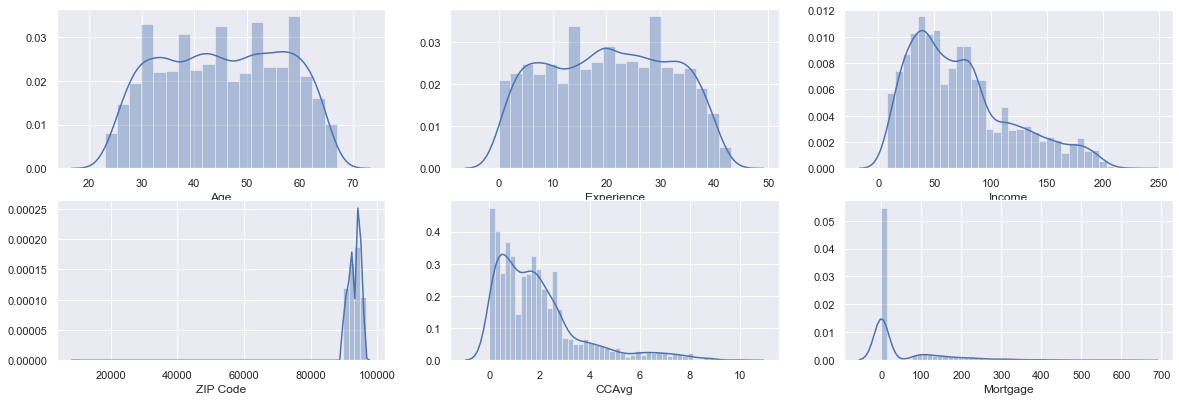

In [18]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continue_variables):
    ax=fig.add_subplot(3,3,i+1)
    sns.distplot(Bank_Personal_DF[col])

### Observation
Age and Experience are uniformaly distributed and show a good similarities in distribution.

Income, CCAvg, Mortgage are positively Skewed

ZIP code is negative Skew or it contain values from single region.

Mortgage contain most of the values = 0

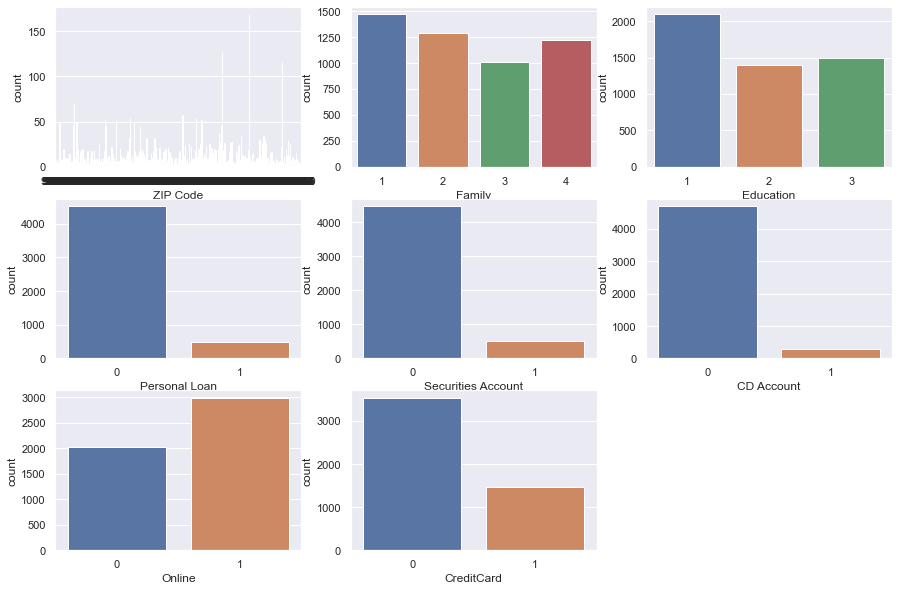

In [19]:
fig=plt.figure(figsize=(15,10))
for i,col in enumerate(category_variables):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(Bank_Personal_DF[col])

### Observation
Most customer doesn't have Securities Account, CD Account and CreditCard

More customers use internet banking facilities.

More customers are Undergraduate and have family size one.

In [20]:
Bank_Personal_DF.dtypes

Age                     int64
Experience            float64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### Convert as Category Variables

In [21]:
Bank_Personal_DF['Family'] = Bank_Personal_DF['Family'].astype('category')
Bank_Personal_DF['Education'] = Bank_Personal_DF['Education'].astype('category')
Bank_Personal_DF['Personal Loan'] = Bank_Personal_DF['Personal Loan'].astype('category')
Bank_Personal_DF['Online'] = Bank_Personal_DF['Online'].astype('category')
Bank_Personal_DF['CreditCard'] = Bank_Personal_DF['CreditCard'].astype('category')

In [22]:
Bank_Personal_DF.dtypes

Age                      int64
Experience             float64
Income                   int64
ZIP Code                 int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account       int64
CD Account               int64
Online                category
CreditCard            category
dtype: object

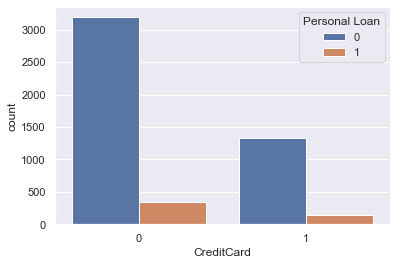

In [23]:
# Credit Card V/s Personal Loan
sns.countplot(x=Bank_Personal_DF['CreditCard'],hue= Bank_Personal_DF['Personal Loan']);

In [24]:
Bank_Personal_DF['CreditCard'].value_counts(normalize = True)

0    0.706
1    0.294
Name: CreditCard, dtype: float64

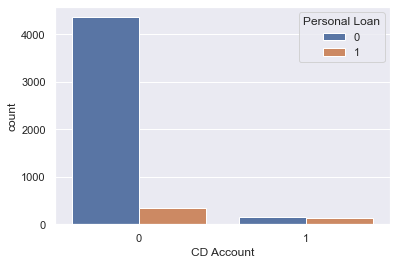

In [25]:
#CD Account V/s Personal Loan
sns.countplot(x=Bank_Personal_DF['CD Account'],hue= Bank_Personal_DF['Personal Loan']);

In [26]:
Bank_Personal_DF['CD Account'].value_counts(normalize = True)


0    0.9396
1    0.0604
Name: CD Account, dtype: float64

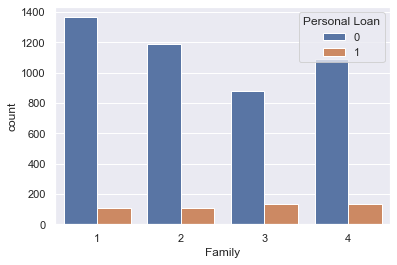

In [27]:
sns.countplot(x=Bank_Personal_DF['Family'],hue= Bank_Personal_DF['Personal Loan']);


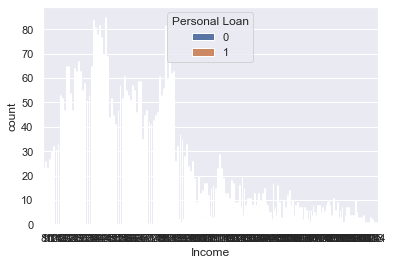

In [28]:
sns.countplot(x=Bank_Personal_DF['Income'],hue= Bank_Personal_DF['Personal Loan']);


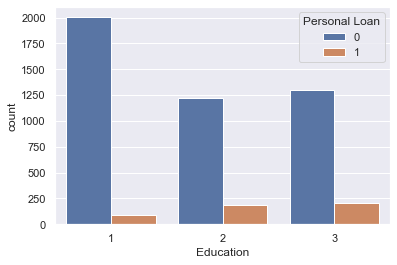

In [29]:
sns.countplot(x=Bank_Personal_DF['Education'],hue= Bank_Personal_DF['Personal Loan']);


## OBSERVATION
Professionals are more viable to buy personal loans from a bank rather than people who are under-graduated.


In [30]:
Bank_Personal_DF['Mortgage'].unique()

array([  0, 155, 104, 134, 111, 260, 163, 159,  97, 122, 193, 198, 285,
       412, 153, 211, 207, 240, 455, 112, 336, 132, 118, 174, 126, 236,
       166, 136, 309, 103, 366, 101, 251, 276, 161, 149, 188, 116, 135,
       244, 164,  81, 315, 140,  95,  89,  90, 105, 100, 282, 209, 249,
        91,  98, 145, 150, 169, 280,  99,  78, 264, 113, 117, 325, 121,
       138,  77, 158, 109, 131, 391,  88, 129, 196, 617, 123, 167, 190,
       248,  82, 402, 360, 392, 185, 419, 270, 148, 466, 175, 147, 220,
       133, 182, 290, 125, 124, 224, 141, 119, 139, 115, 458, 172, 156,
       547, 470, 304, 221, 108, 179, 271, 378, 176,  76, 314,  87, 203,
       180, 230, 137, 152, 485, 300, 272, 144,  94, 208, 275,  83, 218,
       327, 322, 205, 227, 239,  85, 160, 364, 449,  75, 107,  92, 187,
       355, 106, 587, 214, 307, 263, 310, 127, 252, 170, 265, 177, 305,
       372,  79, 301, 232, 289, 212, 250,  84, 130, 303, 256, 259, 204,
       524, 157, 231, 287, 247, 333, 229, 357, 361, 294,  86, 32

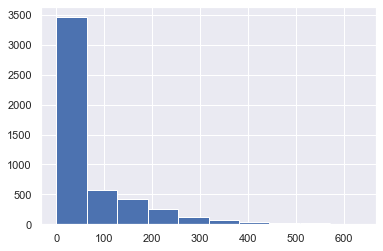

In [31]:
Bank_Personal_DF['Mortgage'].hist();

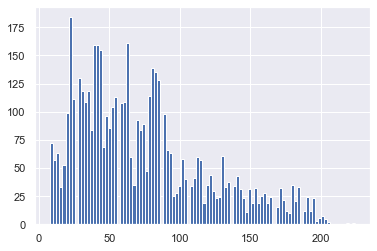

In [32]:
Bank_Personal_DF['Income'].hist(bins=100);

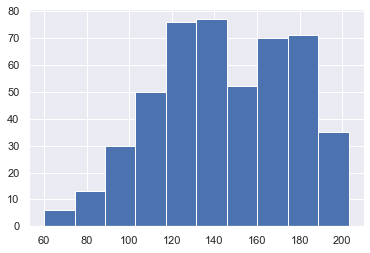

In [33]:
Bank_Personal_DF['Income'][Bank_Personal_DF['Personal Loan']==1].hist(bins=10)

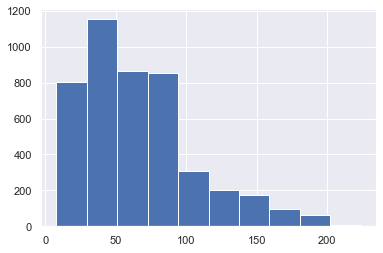

In [34]:
Bank_Personal_DF['Income'][Bank_Personal_DF['Personal Loan']==0].hist(bins=10)

In [35]:
Bank_Personal_DF['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

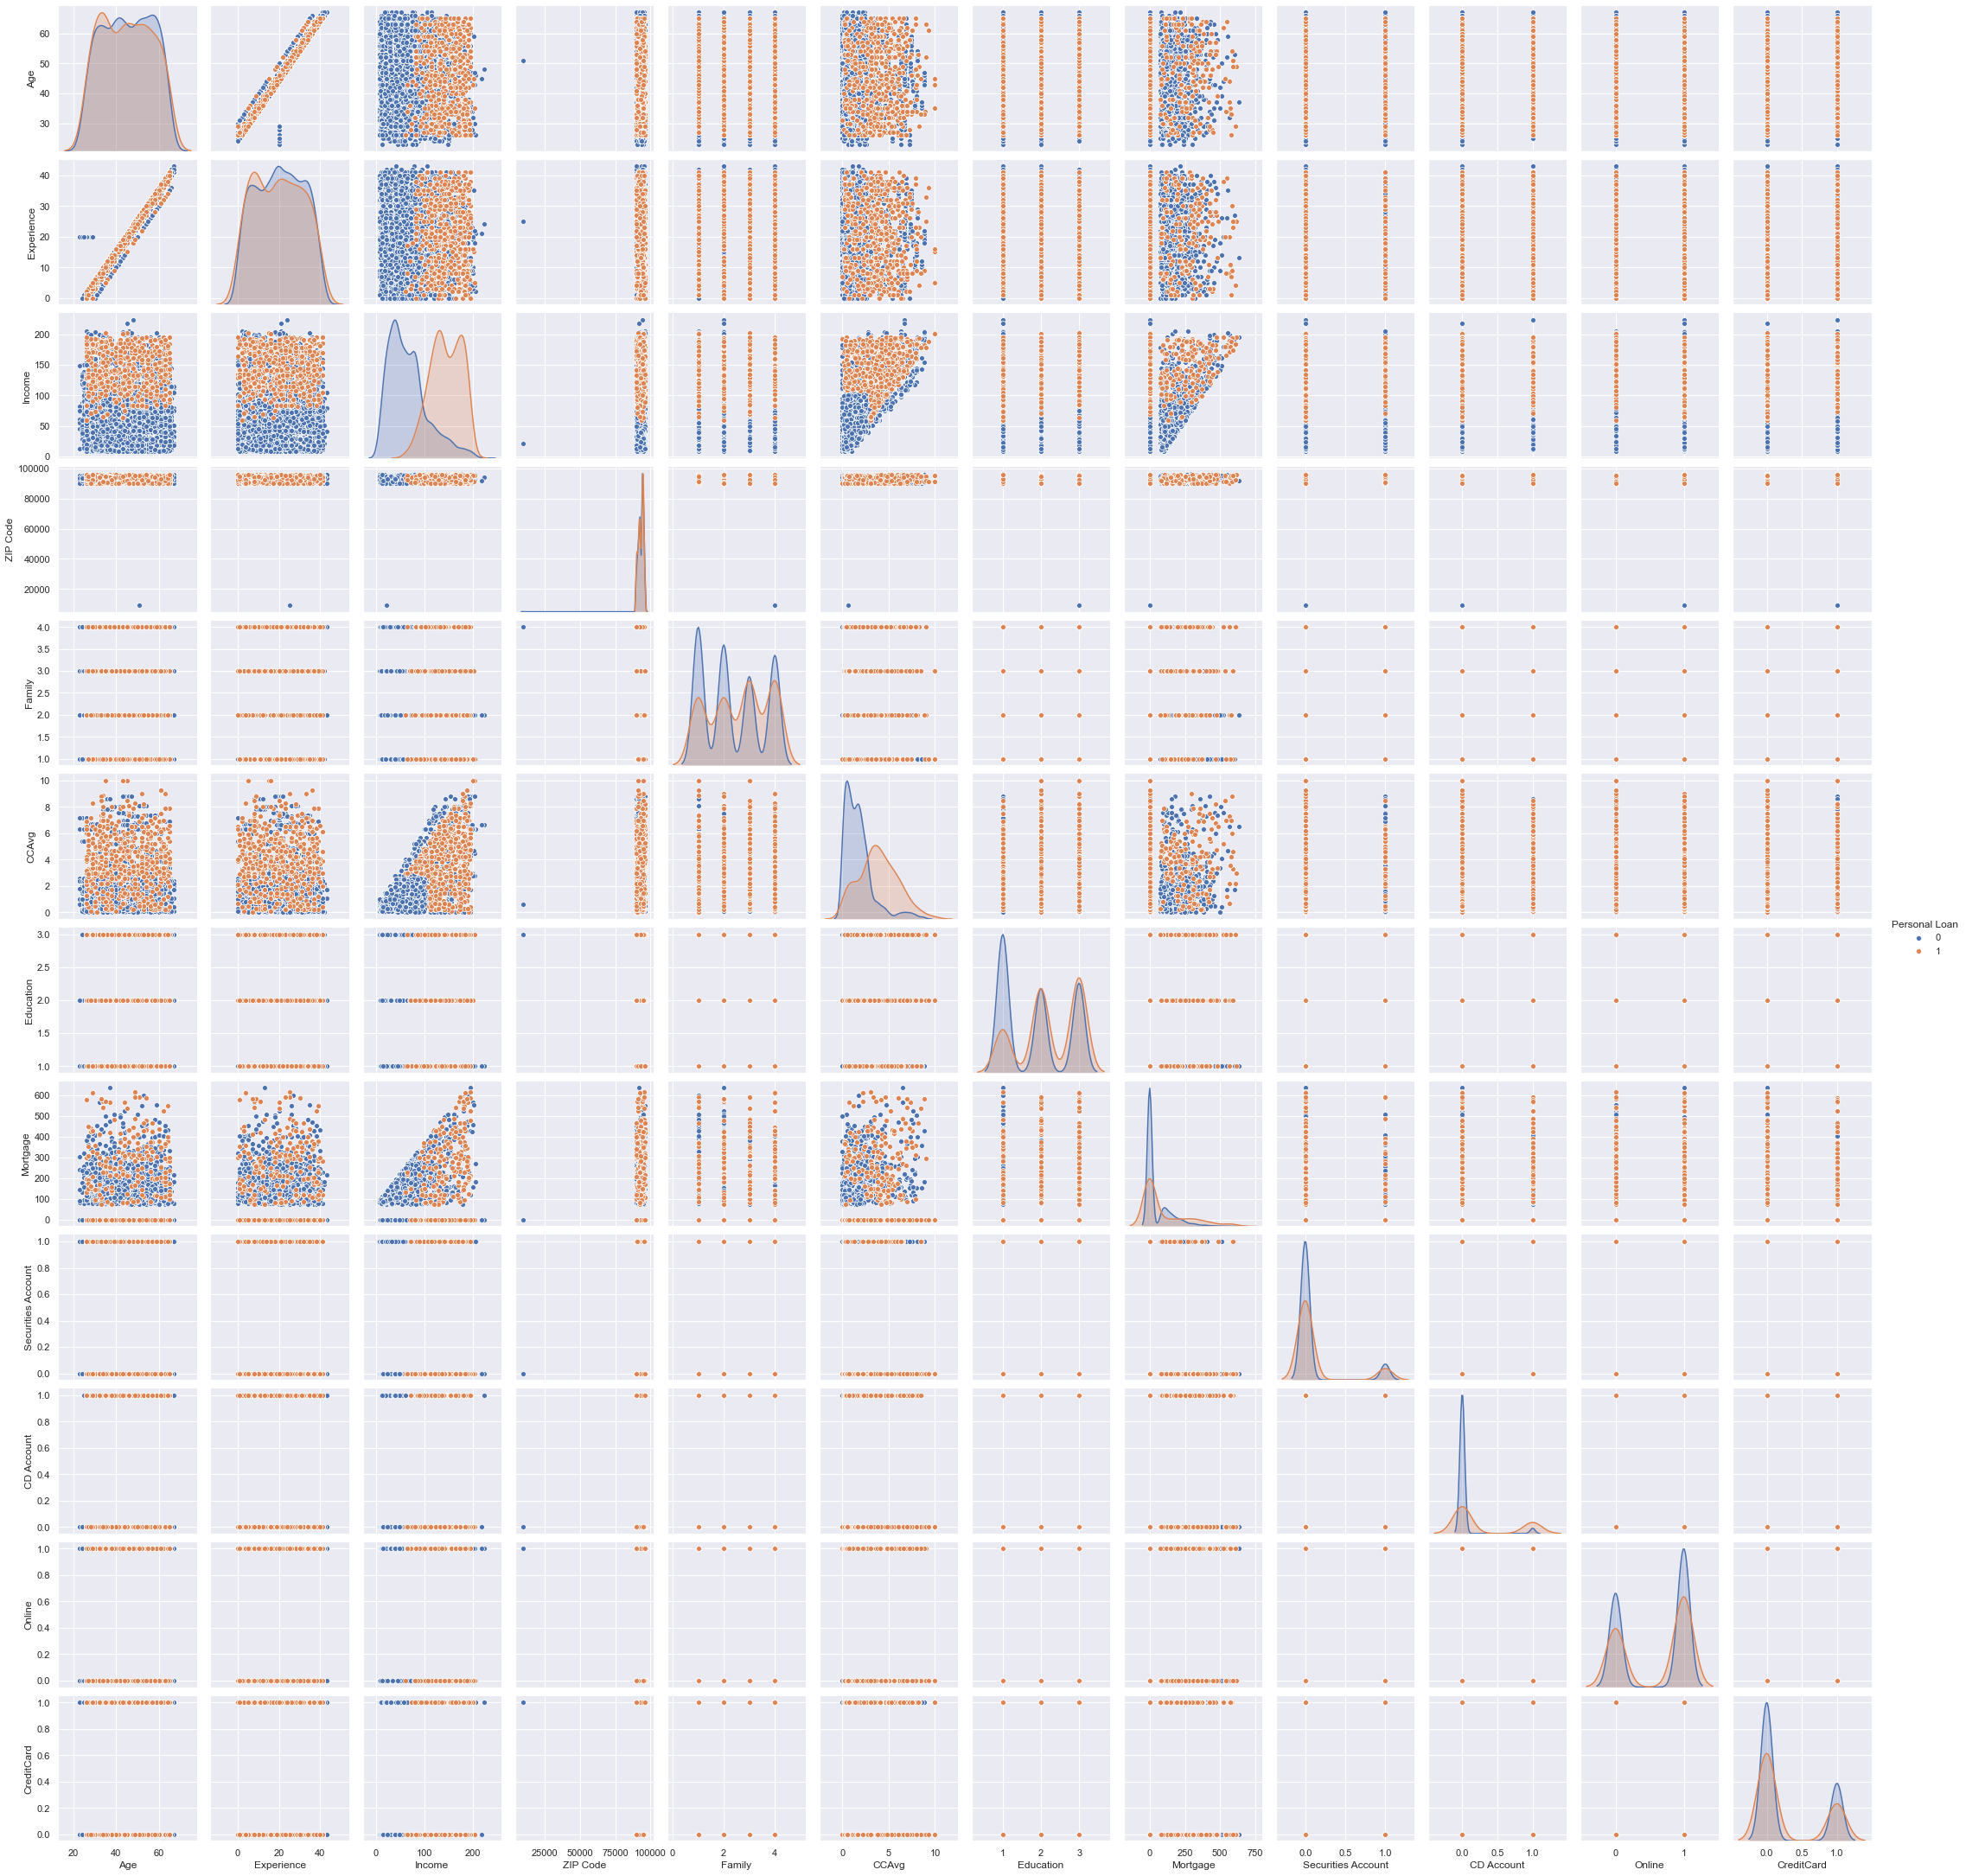

In [36]:
sns.pairplot(Bank_Personal_DF,hue='Personal Loan');

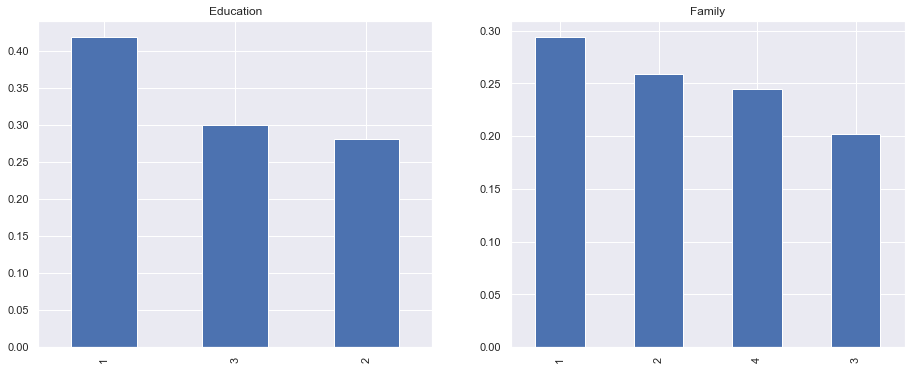

In [37]:
plt.figure(1)
plt.subplot(131)
Bank_Personal_DF['Education'].value_counts(True).plot.bar(figsize=(24,6),title = 'Education')
plt.subplot(132)
Bank_Personal_DF['Family'].value_counts(True).plot.bar(figsize=(24,6),title = 'Family');

# Bivariate Analysis



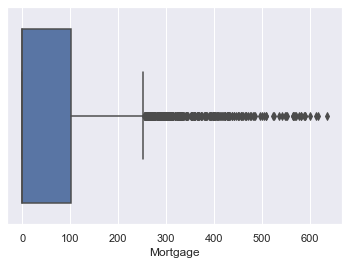

In [38]:
 sns.boxplot(x="Mortgage", data=Bank_Personal_DF)

### Observation
Mortgage has more outliers as we can see in the boxplot

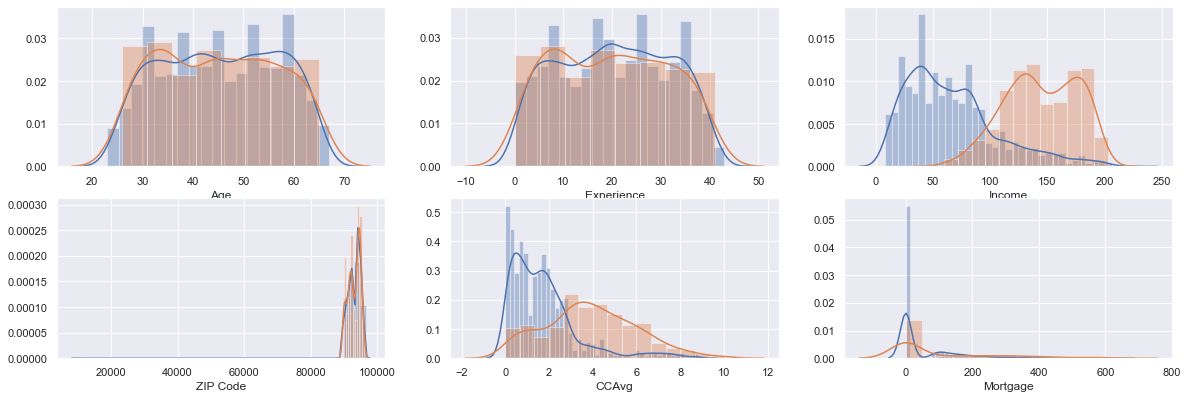

In [39]:
fig=plt.figure(figsize=(20,10))
for i,col in enumerate(continue_variables):
    ax=fig.add_subplot(3,3,i+1)
    ax1=sns.distplot(Bank_Personal_DF[col][Bank_Personal_DF['Personal Loan']==0],hist=True,label='No Personal Lone')
    sns.distplot(Bank_Personal_DF[col][Bank_Personal_DF['Personal Loan']==1],hist=True,ax=ax1,label='Personal Lone')

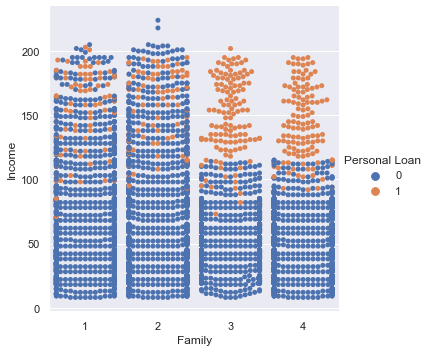

In [40]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = Bank_Personal_DF, kind='swarm')

### Observation: 

Customers who have family  3 or greater with higher income between 100 to 200K are more chances to take loan.

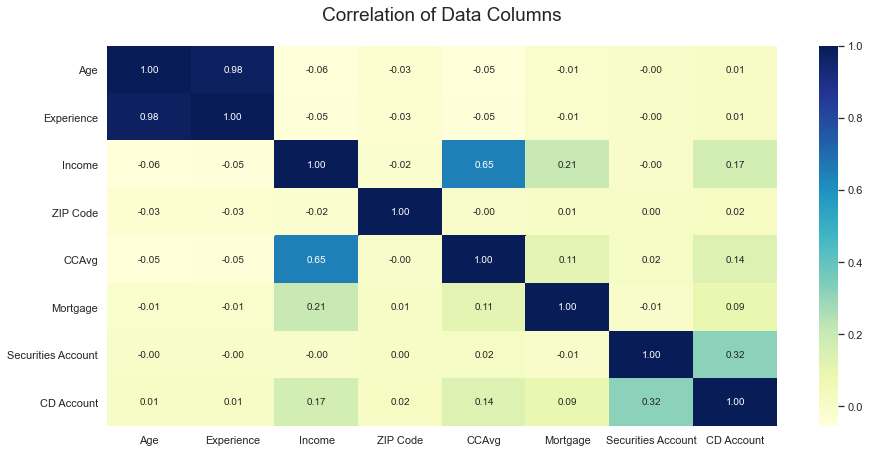

In [41]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Data Columns', y=1.05, size=19)
sns.heatmap(Bank_Personal_DF.corr(), annot=True, fmt='.2f',cmap="YlGnBu")

### Observation
Age and Experience are highly correlated and the correlation is almost 1.

'Income' and 'CCAvg' is moderately correlated.

Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.

Heat map there is association of 'CD Account' with 'Credit Card', 'Securities Account', 'Online', 'CCAvg' and 'Income'.

'Income' influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.

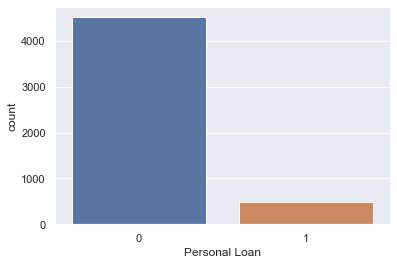

In [42]:
sns.countplot(Bank_Personal_DF['Personal Loan'])

In [43]:
## Contingency table to get Approved  %
def get_contingency_table(df,target,var):
    ct_res = pd.crosstab(df[var],df[target],margins=True)
    ct_res['Approved (%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns=['All'])


In [44]:
get_contingency_table(Bank_Personal_DF,'Personal Loan','Education')

Personal Loan     0    1  Approved (%)
Education                             
1              2003   93          4.44
2              1221  182         12.97
3              1296  205         13.66
All            4520  480          9.60

In [45]:
get_contingency_table(Bank_Personal_DF,'Personal Loan','Family')

Personal Loan     0    1  Approved (%)
Family                                
1              1365  107          7.27
2              1190  106          8.18
3               877  133         13.17
4              1088  134         10.97
All            4520  480          9.60

Count of family members not significantly affect probability.

In [46]:
get_contingency_table(Bank_Personal_DF,'Personal Loan','CreditCard')

Personal Loan     0    1  Approved (%)
CreditCard                            
0              3193  337          9.55
1              1327  143          9.73
All            4520  480          9.60

customer with credit card  by bank doesn’t seem to affect the probability of buying a personal loan.

In [47]:
get_contingency_table(Bank_Personal_DF,'Personal Loan','Online')

Personal Loan     0    1  Approved (%)
Online                                
0              1827  189          9.38
1              2693  291          9.75
All            4520  480          9.60

customer uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.

In [48]:
get_contingency_table(Bank_Personal_DF,'Personal Loan','Securities Account')

Personal Loan          0    1  Approved (%)
Securities Account                         
0                   4058  420          9.38
1                    462   60         11.49
All                 4520  480          9.60

In [49]:
get_contingency_table(Bank_Personal_DF,'Personal Loan','CD Account')

Personal Loan     0    1  Approved (%)
CD Account                            
0              4358  340          7.24
1               162  140         46.36
All            4520  480          9.60

customer with CD account has more chance of Personal loan buying

In [50]:
get_contingency_table(Bank_Personal_DF,'Personal Loan','CreditCard')

Personal Loan     0    1  Approved (%)
CreditCard                            
0              3193  337          9.55
1              1327  143          9.73
All            4520  480          9.60

In [51]:
get_contingency_table(Bank_Personal_DF,'Personal Loan','CCAvg')

Personal Loan     0    1  Approved (%)
CCAvg                                 
0.0             105    1          0.94
0.1             181    2          1.09
0.2             196    8          3.92
0.3             235    6          2.49
0.4             175    4          2.23
...             ...  ...           ...
8.9               0    1        100.00
9.0               0    2        100.00
9.3               0    1        100.00
10.0              0    3        100.00
All            4520  480          9.60

[109 rows x 3 columns]

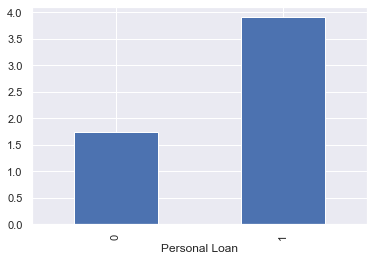

In [52]:
Bank_Personal_DF.groupby('Personal Loan')['CCAvg'].mean().plot(kind='bar')

 ### Observation-applicants who spend more on credit cards are more chance of buying personal loans.

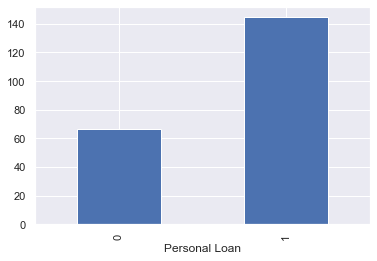

In [53]:
Bank_Personal_DF.groupby('Personal Loan')['Income'].mean().plot(kind='bar')

 ### Observation-customers with high incomes are more feasible to buy the personal loan 

In [54]:
n_true = len(Bank_Personal_DF.loc[Bank_Personal_DF['Personal Loan'] == 1])
n_false = len(Bank_Personal_DF.loc[Bank_Personal_DF['Personal Loan'] == 0])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 480 (9.60%)
Number of false cases: 4520 (90.40%)


In [55]:
def get_stratified_ct(df,stra_var):
    ct_res = pd.crosstab(index=[df[stra_var],df['CD Account']],columns= df['Personal Loan'],margins=True)
    ct_res['Approved (%)']=round(ct_res[1]/ct_res['All']*100,2)
    return ct_res.drop(columns='All')

In [56]:
get_stratified_ct(Bank_Personal_DF,'Family')

Personal Loan         0    1  Approved (%)
Family CD Account                         
1      0           1318   71          5.11
       1             47   36         43.37
2      0           1144   85          6.92
       1             46   21         31.34
3      0            840   88          9.48
       1             37   45         54.88
4      0           1056   96          8.33
       1             32   38         54.29
All                4520  480          9.60

In [57]:
get_stratified_ct(Bank_Personal_DF,'CCAvg')

Personal Loan        0    1  Approved (%)
CCAvg CD Account                         
0.0   0            103    1          0.96
      1              2    0          0.00
0.1   0            171    1          0.58
      1             10    1          9.09
0.2   0            189    5          2.58
...                ...  ...           ...
8.9   0              0    1        100.00
9.0   0              0    2        100.00
9.3   0              0    1        100.00
10.0  0              0    3        100.00
All               4520  480          9.60

[191 rows x 3 columns]

### Data Cleanp

56.4988


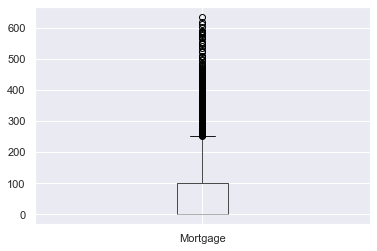

In [58]:
print(Bank_Personal_DF['Mortgage'].mean())
Bank_Personal_DF['Mortgage'].std()
Bank_Personal_DF.boxplot(column=['Mortgage'], return_type='axes');


In [59]:
#As we have lot of OutLiers for Mortgage-We can remove by using Z-Score
Bank_Personal_DF['Mortgage_Score']=np.abs(stats.zscore(Bank_Personal_DF['Mortgage'])) 
Bank_Personal_DF=Bank_Personal_DF[Bank_Personal_DF['Mortgage_Score']<3] 
Bank_Personal_DF.drop('Mortgage_Score',axis=1,inplace=True)
Bank_Personal_DF.shape

(4895, 13)

In [60]:
Bank_Personal_DF[['Age','Experience','Personal Loan']].corr()

Age  Experience
Age         1.000000    0.976775
Experience  0.976775    1.000000

 ANd compared to Experience ,Age shows a little better correlation with Personal loan

In [61]:
#We can Drop ‘ZIP Code’ & ‘Experience’ columns in analysis since ‘ZIP Code’ are just numbers of series
#& ‘Experience’ is highly correlated with ‘Age’ as per Profile Report.

#Zip code is numerical but it not continuous and it can be like a category because zip code is defining a region 
# and the region should be categorical value.

#If we keep Zip code as the numerical value then a higher value would be given higher preference
#but no one should get preference based on their region

#Here there too many categories in the zip code so dropping zip code

Bank_Personal_DF.drop('Experience', axis=1, inplace=True)
Bank_Personal_DF.drop('ZIP Code', axis=1, inplace=True)

Bank_Personal_DF.head()


Age  Income Family  CCAvg Education  Mortgage Personal Loan  \
0   25      49      4    1.6         1         0             0   
1   45      34      3    1.5         1         0             0   
2   39      11      1    1.0         1         0             0   
3   35     100      1    2.7         2         0             0   
4   35      45      4    1.0         2         0             0   

   Securities Account  CD Account Online CreditCard  
0                   1           0      0          0  
1                   1           0      0          0  
2                   0           0      0          0  
3                   0           0      0          0  
4                   0           0      0          1

In [62]:
Bank_Personal_DF.drop_duplicates(inplace=True)

In [63]:
Bank_Personal_DF.shape

(4882, 11)

# Split the data into training and test set in the ratio of 70:30 respectively 

# Modeling

In [64]:
Bank_Personal_DF.head(10)

Age  Income Family  CCAvg Education  Mortgage Personal Loan  \
0   25      49      4    1.6         1         0             0   
1   45      34      3    1.5         1         0             0   
2   39      11      1    1.0         1         0             0   
3   35     100      1    2.7         2         0             0   
4   35      45      4    1.0         2         0             0   
5   37      29      4    0.4         2       155             0   
6   53      72      2    1.5         2         0             0   
7   50      22      1    0.3         3         0             0   
8   35      81      3    0.6         2       104             0   
9   34     180      1    8.9         3         0             1   

   Securities Account  CD Account Online CreditCard  
0                   1           0      0          0  
1                   1           0      0          0  
2                   0           0      0          0  
3                   0           0      0          0  
4                   0           0      0          1  
5                   0           0      1          0  
6                   0           0      1          0  
7                   0           0      0          1  
8                   0           0      1          0  
9                   0           0      0          0

In [65]:
X = Bank_Personal_DF.drop('Personal Loan', axis=1)
y = Bank_Personal_DF['Personal Loan']

In [66]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [67]:
X.head()

Age  Income  CCAvg  Mortgage  Securities Account  CD Account  Family_2  \
0   25      49    1.6         0                   1           0         0   
1   45      34    1.5         0                   1           0         0   
2   39      11    1.0         0                   0           0         0   
3   35     100    2.7         0                   0           0         0   
4   35      45    1.0         0                   0           0         0   

   Family_3  Family_4  Education_2  Education_3  Online_1  CreditCard_1  
0         0         1            0            0         0             0  
1         1         0            0            0         0             0  
2         0         0            0            0         0             0  
3         0         0            1            0         0             0  
4         0         1            1            0         0             1

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30,random_state=1)
print(X_train.shape)
print(X_test.shape)

(3417, 13)
(1465, 13)


In [69]:
print('original data, Personal loan:{0} ({1:0.5f}%)'.format(y[y==1].shape[0], 100*y[y==1].shape[0]/y.shape[0]))
print('original data, Personal loan:{0} ({1:0.5f}%)'.format(y[y==0].shape[0], 100*y[y==0].shape[0]/y.shape[0]))
print('-----------------------')
print('training data , Personal loan:{0} ({1:0.5f}%)'.format(y_train[y_train==1].shape[0], 100*y_train[y_train==1].shape[0]/y_train.shape[0]))
print('training data , Personal loan:{0} ({1:0.5f}%)'.format(y_train[y_train==0].shape[0], 100*y_train[y_train==0].shape[0]/y_train.shape[0]))
print('-----------------------')
print('testing data , Personal loan:{0} ({1:0.5f}%)'.format(y_test[y_test==1].shape[0], 100*y_test[y_test==1].shape[0]/y_test.shape[0]))
print('testing data , Personal loan:{0} ({1:0.5f}%)'.format(y_test[y_test==0].shape[0], 100*y_test[y_test==0].shape[0]/y_test.shape[0]))

original data, Personal loan:433 (8.86932%)
original data, Personal loan:4449 (91.13068%)
-----------------------
training data , Personal loan:304 (8.89669%)
training data , Personal loan:3113 (91.10331%)
-----------------------
testing data , Personal loan:129 (8.80546%)
testing data , Personal loan:1336 (91.19454%)


# Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance 

## STATS MODEL

In [70]:
#Build the logistic regression model
import statsmodels.api as sm
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.109074
         Iterations 10


In [71]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary2())

                            Results: Logit
Model:                Logit             Pseudo R-squared:  0.637      
Dependent Variable:   Personal Loan     AIC:               773.4120   
Date:                 2020-09-18 02:33  BIC:               859.3232   
No. Observations:     3417              Log-Likelihood:    -372.71    
Df Model:             13                LL-Null:           -1025.6    
Df Residuals:         3403              LLR p-value:       3.0581e-271
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       10.0000                                         
----------------------------------------------------------------------
                    Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------------
const              -13.6247   0.8569 -15.9003 0.0000 -15.3042 -11.9453
Age                  0.0108   0.0086   1.2528 0.2103  -0.0061   0.0277
Income               0.0652   0.00

####  Interpretation of Pseudo R^2

A pseudo R^2 of 63 % indicates that 63 % of the uncertainty of the intercept only model is explained by the full model



In [72]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [73]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.05
lgcoef[pval_filter]

coef  Odds_ratio  probability  pval
Education_2    4.07       58.30         0.98  0.00
Education_3    4.06       57.92         0.98  0.00
CD Account     3.61       36.82         0.97  0.00
Family_3       2.13        8.39         0.89  0.00
Family_4       1.65        5.20         0.84  0.00
CCAvg          0.20        1.22         0.55  0.00
Income         0.07        1.07         0.52  0.00
Online_1      -0.61        0.54         0.35  0.00
CreditCard_1  -0.94        0.39         0.28  0.00
const        -13.62        0.00         0.00  0.00

In [74]:
X_train.isnull().sum()

Age                   0
Income                0
CCAvg                 0
Mortgage              0
Securities Account    0
CD Account            0
Family_2              0
Family_3              0
Family_4              0
Education_2           0
Education_3           0
Online_1              0
CreditCard_1          0
dtype: int64

In [75]:
scalar = preprocessing.StandardScaler()
scalar.fit(X_train)
X_train=scalar.transform(X_train)
scalar.fit(X_test)
X_test=scalar.transform(X_test)
logreg = LogisticRegression(solver='liblinear', random_state=1)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [76]:
 # train data
pred_train = logreg.predict(X_train) 
cm_train = confusion_matrix(y_train, pred_train)
print('Train Data-confusion_matrix = \n',cm_train)

Train Data-confusion_matrix = 
 [[3086   27]
 [ 108  196]]


In [77]:
 # test data
pred_test = logreg.predict(X_test) 
cm_test = confusion_matrix(y_test, pred_test)
print('Test Data-confusion_matrix = \n',cm_test)

Test Data-confusion_matrix = 
 [[1322   14]
 [  38   91]]


In [78]:
y_pred=logreg.predict(X_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1336
           1       0.87      0.71      0.78       129

    accuracy                           0.96      1465
   macro avg       0.92      0.85      0.88      1465
weighted avg       0.96      0.96      0.96      1465

0.9645051194539249
[[1322   14]
 [  38   91]]


In [79]:
lg_prob=logreg.predict_proba(X_test)
lg_prob
fp,tp,th=roc_curve(y_test,lg_prob[:,1])
roc=auc(fp,tp)
print(roc)

0.9565868263473054


In [80]:
## function to get confusion matrix in a proper format
def draw_matrix( actual, predicted ):
    cm = confusion_matrix( actual, predicted,[1,0])
    sns.heatmap(cm, annot=True,  fmt='.2f',cmap="YlGnBu", xticklabels = [1,0] , yticklabels = [1,0] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()   


Trainig accuracy 0.9604916593503073

Testing accuracy 0.9645051194539249

Confusion Matrix


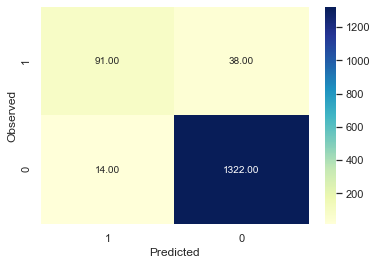

None

Recall: 0.7054263565891473

Precision: 0.8666666666666667

F1 Score: 0.7777777777777779

Roc Auc Score: 0.8474736573364897


In [81]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_matrix(y_test,y_pred))
print()
print("Recall:",recall_score(y_test,y_pred))
print()
print("Precision:",precision_score(y_test,y_pred))
print()
print("F1 Score:",f1_score(y_test,y_pred))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_pred))

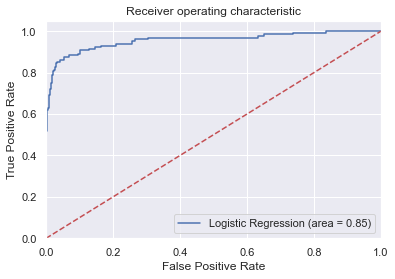

In [82]:
#AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

#### Thresholding

In [83]:
threshold = 0.5
preds = np.where(logreg.predict_proba(X_test)[:,1]>threshold,1,0)

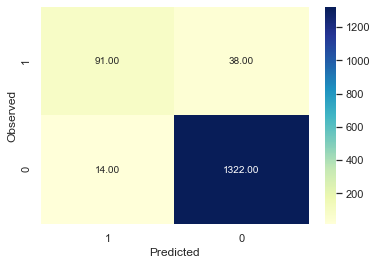

None

Recall: 0.7054263565891473

Precision: 0.8666666666666667

F1 Score: 0.7777777777777779

Roc Auc Score: 0.8474736573364897


In [84]:
print(draw_matrix(y_test,pred_test))
print()
print("Recall:",recall_score(y_test,preds))
print()
print("Precision:",precision_score(y_test,preds))
print()
print("F1 Score:",f1_score(y_test,preds))
print()
print("Roc Auc Score:",roc_auc_score(y_test,preds))

 # 5. Check different parameters of Logistic Regression and give your reasoning whether the modelperformance is affected due to it or not?

### Model Performance Tuning 

In [85]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [86]:
## print a list of floating numbers
def printflist(x):
    for i in x:
        print('{:.3f}'.format(i), end=' ')
    print()

In [87]:
train_scores=[]
test_scores=[]
recall_scores=[]
precision_scores=[]
f1_scores=[]
roc_auc_scores=[]

# The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only
# L2 regularization with primal formulation, or no regularization.
# The ‘liblinear’ solver supports both L1 and L2 regularization, 
# with a dual formulation only for the L2 penalty. 
# The Elastic-Net regularization is only supported by the ‘saga’ solver.

solvers = ['lbfgs', 'sag', 'saga', 'newton-cg', 'liblinear']

for i in solvers:
    md = LogisticRegression(random_state=1, solver=i, max_iter=1000, penalty='l2')
    md.fit(X_train, y_train)
    y_predict = md.predict(X_test)
    train_scores.append(md.score(X_train, y_train))
    test_scores.append(md.score(X_test, y_test))
    recall_scores.append(recall_score(y_test, y_predict))
    precision_scores.append(precision_score(y_test, y_predict))
    f1_scores.append(f1_score(y_test, y_predict))
    roc_auc_scores.append(roc_auc_score(y_test, y_predict))
    
print(solvers)
printflist(train_scores)
printflist(test_scores)
printflist(recall_scores)
printflist(precision_scores)
printflist(f1_scores)
printflist(roc_auc_scores)

['lbfgs', 'sag', 'saga', 'newton-cg', 'liblinear']
0.960 0.960 0.960 0.960 0.960 
0.965 0.965 0.965 0.965 0.965 
0.713 0.713 0.713 0.713 0.705 
0.868 0.868 0.868 0.868 0.867 
0.783 0.783 0.783 0.783 0.778 
0.851 0.851 0.851 0.851 0.847 


In [88]:
train_scores=[]
test_scores=[]
recall_scores=[]
precision_scores=[]
f1_scores=[]
roc_auc_scores=[]

solvers = ['saga','liblinear']  # changing values of solver which works with 'l1'

for i in solvers:
    md = LogisticRegression(random_state=1, solver=i, max_iter=1000, penalty='l1')
    md.fit(X_train, y_train)
    y_predict = md.predict(X_test)
    train_scores.append(md.score(X_train, y_train))
    test_scores.append(md.score(X_test, y_test))
    recall_scores.append(recall_score(y_test, y_predict))
    precision_scores.append(precision_score(y_test, y_predict))
    f1_scores.append(f1_score(y_test, y_predict))
    roc_auc_scores.append(roc_auc_score(y_test, y_predict))
    
print(solvers)
printflist(train_scores)
printflist(test_scores)
printflist(recall_scores)
printflist(precision_scores)
printflist(f1_scores)
printflist(roc_auc_scores)

['saga', 'liblinear']
0.961 0.961 
0.965 0.965 
0.713 0.713 
0.868 0.868 
0.783 0.783 
0.851 0.851 


In [89]:
train_scores=[]
test_scores=[]
recall_scores=[]
precision_scores=[]
f1_scores=[]
roc_auc_scores=[]

C = [0.01, 0.1, 0.25, 0.5, 0.75, 1]  ## testing different C values

for c in C:
    md = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=1, C=c)
    md.fit(X_train, y_train)
    y_predict = md.predict(X_test)
    train_scores.append(md.score(X_train, y_train))
    test_scores.append(md.score(X_test, y_test))
    recall_scores.append(recall_score(y_test, y_predict))
    precision_scores.append(precision_score(y_test, y_predict))
    f1_scores.append(f1_score(y_test, y_predict))
    roc_auc_scores.append(roc_auc_score(y_test, y_predict))

printflist(C)
printflist(train_scores)
printflist(test_scores)
printflist(recall_scores)
print("Precision Start")
printflist(precision_scores)
print("Precision End")
printflist(f1_scores)
printflist(roc_auc_scores)


0.010 0.100 0.250 0.500 0.750 1.000 
0.925 0.958 0.959 0.960 0.961 0.961 
0.925 0.962 0.962 0.965 0.965 0.965 
0.209 0.651 0.674 0.705 0.713 0.713 
Precision Start
0.771 0.884 0.861 0.875 0.868 0.868 
Precision End
0.329 0.750 0.757 0.781 0.783 0.783 
0.602 0.821 0.832 0.848 0.851 0.851 


Trainig accuracy 0.9607843137254902

Testing accuracy 0.9651877133105802

Confusion Matrix


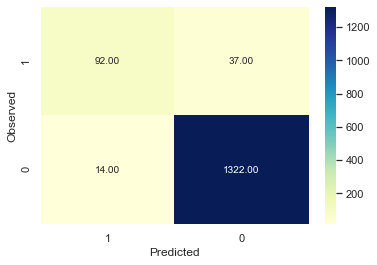

None

Recall: 0.7131782945736435

Precision: 0.8679245283018868

F1 Score: 0.7829787234042553

Roc Auc Score: 0.8513496263287378


In [90]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_matrix(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))


Trainig accuracy 0.9051799824407375

Testing accuracy 0.9119453924914676

Confusion Matrix


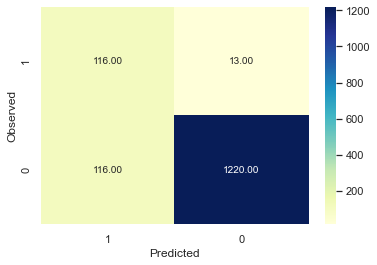

None

Recall: 0.8992248062015504

Precision: 0.5

F1 Score: 0.6426592797783933

Roc Auc Score: 0.9061992294480806


In [91]:
##  change class widgest to 'balanced'
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=1, class_weight='balanced')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_matrix(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Trainig accuracy 0.9584430787240269

Testing accuracy 0.9617747440273038

Confusion Matrix


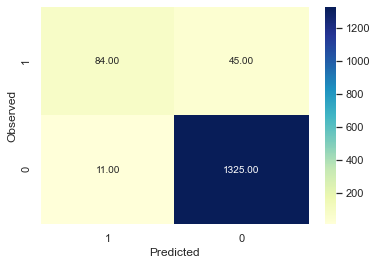

None

Recall: 0.6511627906976745

Precision: 0.8842105263157894

F1 Score: 0.7500000000000001

Roc Auc Score: 0.8214646288817714


In [92]:
# c=0.1 giving good results with high precision value

model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=1, C=0.1)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_matrix(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [93]:
!pip install yellowbrick

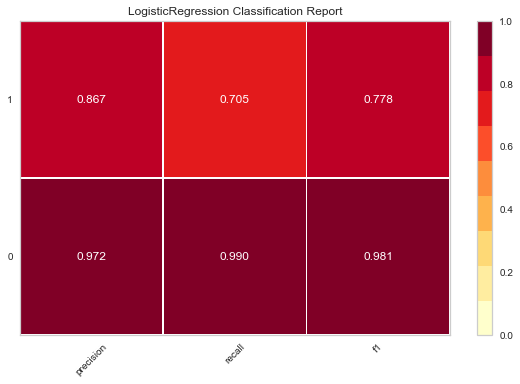

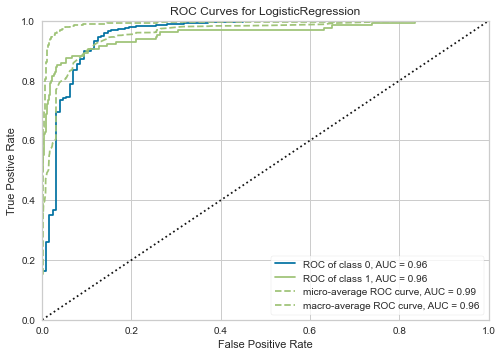

In [94]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(logreg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(logreg)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show();

# 6. Give Business understanding of your model? 

## SUMMARY OF OBSERVATIONS FROM DATA SET
Experience is highly correlated with Age	High correlation

ID has unique values	Unique

CCAvg has 106 (2.1%) zeros	

Mortgage has 3462 (69.2%) zeros


93% of the customer doesn’t have a certificate of deposit (CD) account with the bank.

70% of the customer doesn’t use a credit card issued by UniversalBank.

59% of customers use internet banking facilities.

90% of the customer doesn’t accept the personal loan offered in the last campaign.

89% of the customer doesn’t have a securities account with the bank.

42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.

29% of the customer’s family size is 1.

94% of the customer doesn’t have a certificate of deposit (CD) account with the bank.

71% of the customer doesn’t use a credit card issued by UniversalBank.


## BUSINESS INSIGHTS SUMMARY
#### True Positive (TP, observed=1,predicted=1): 
Means It Predicted that customer will buy personal loan and the actually customer did buy.

#### False Positive (FP, observed=0,predicted=1): 
Means It Predicted that the customer will buy personal loan but the actually customer did not.

#### True Negative (TN, observed=0,predicted=0): 
Means It Predicted that the customer will not buy personal loan and the actually customer did not buy personal loan.

#### False Negative (FN, observed=1,predicted=0):
Means It Predicted that the customer will not buy personal loan but the actually customer did buy personal loan.

### Conclusion:
Need model to identify True Positive customers as target customers.i.e

Need to run model to find the possible customers as target customers (Predicted Positive = TP + FN),  which more customers really buying personal loans (True Positive / TP) higher will be the success ratio. 

#### Sensitivity or True Positive==> (TP/TP+FN) should be main consideration for this analysis.